In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('PythonData/SVM-radial.csv', header=0)

In [3]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = data.iloc[:,2])

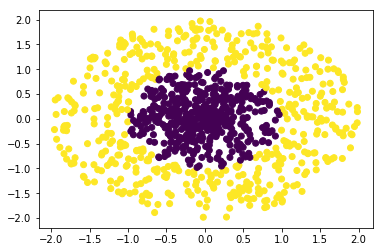

In [4]:
plt.show()

In [2]:
# We will build an SVM classifier for this data set, using the radial kernel
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:1], data.iloc[:,2], test_size=0.25)

In [12]:
# First we try a logistic regression:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [8]:
predictions = logisticRegr.predict(x_test)

In [9]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.544


In [10]:
cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)

[[82 34]
 [80 54]]


In [11]:
# Pretty bad. No let's try a standard linear SVM ...
svc_linear = svm.SVC(kernel='linear', C=1)
svc_linear.fit(x_train, y_train)
predicted= svc_linear.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[104  12]
 [ 88  46]]


In [12]:
# A little better ... Now let's try the radial kernel: The default kernel is 'rbf'. 
# We will use the default parameters at first

svc_radial = svm.SVC()
svc_radial.fit(x_train, y_train)
predicted= svc_radial.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[98 18]
 [44 90]]


In [13]:
# Much better. Let's try different values for gamma ...

svc_radial = svm.SVC(gamma = .1)
svc_radial.fit(x_train, y_train)
predicted= svc_radial.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[104  12]
 [ 54  80]]


In [14]:
svc_radial = svm.SVC(gamma = .01)
svc_radial.fit(x_train, y_train)
predicted= svc_radial.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[116   0]
 [111  23]]


In [15]:
svc_radial = svm.SVC(gamma = 2.0)
svc_radial.fit(x_train, y_train)
predicted= svc_radial.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[98 18]
 [45 89]]


In [16]:
# We try the banking dataset we saw earlier ... first a quick clean up as before:

data = pd.read_csv('PythonData/banking.csv', header=0)
data = data.dropna()
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# First we do a logistic regression ...
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = classifier.predict(X_test)
cnf = confusion_matrix(y_test, y_pred)
print(cnf)

[[9038  111]
 [ 935  213]]


In [19]:
# Not great. Let's try a linear SVM ...
svc_linear = svm.SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)
predicted= svc_linear.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[9031  118]
 [ 928  220]]


In [20]:
# Not much better. Let's try a radial kernel ...
svc_radial = svm.SVC(gamma = 10)
svc_radial.fit(X_train, y_train)
predicted= svc_radial.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[9039  110]
 [ 968  180]]


In [21]:
# Not much improvement!

In [3]:
# We try a new dataset - seismic bumps
data = pd.read_csv('PythonData/seismic-bumps.csv', header=0)

In [23]:
data.shape

(2584, 19)

In [24]:
X = data.iloc[:,0:17]
y = data.iloc[:,18]

In [25]:
X2 = pd.get_dummies(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X2, y)

In [27]:
# We try logistic regression first ...
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)
cnf = confusion_matrix(y_test, y_pred)
print(cnf)

[[606   0]
 [ 40   0]]


In [4]:
# This model is 93% accurate! The problem is an inbalanced data set - the thing we
# are trying to predict is too rare. We will use an algorithm called SMOTE
# to resample the dataset and make it more balanced. Note that we resample 
# the training data, not the test data! We need to reform the dataset ...
data2 = pd.get_dummies(data)

In [30]:
data2.shape

(2584, 25)

In [19]:
dataTrain, dataTest = train_test_split(data2, test_size = .25)

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
sm = SMOTE(random_state=12, ratio = 1.0)

In [20]:
x_train = dataTrain.iloc[:,0:23]
y_train = dataTrain.iloc[:,24]

In [21]:
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\wjs130130\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
# We'll need test data - notice we do not resample this part ...
x_test = dataTest.iloc[:,0:23]
y_test = dataTest.iloc[:,24]

In [15]:
# Let's try logistic regression again ...
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train_res, y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = classifier.predict(x_test)
cnf = confusion_matrix(y_test, y_pred)
print(cnf)

[[465 173]
 [  1   7]]


In [18]:
# Much better! Let's try SVM ... THIS WILL TAKE A WHILE!
svc_linear = svm.SVC(kernel='linear', C=1)
svc_linear.fit(x_train, y_train)
predicted= svc_linear.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[638   0]
 [  8   0]]


In [24]:
svc_radial = svm.SVC(gamma = 10)
svc_radial.fit(x_train, y_train)
predicted= svc_radial.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[638   0]
 [  2   6]]


In [25]:
# This converged quickly and worked well!